<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-07 12:38:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  45.0MB/s    in 4.3s    

2025-08-07 12:38:58 (46.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 162.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 188.2 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 166.2 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [11]:
import pandas as pd

# Load your data
df = pd.read_csv('survey-data.csv')

# Print all column names
print("Available columns in your dataset:")
print(df.columns.tolist())

# Display the first few rows to see the data structure
df.head()

Available columns in your dataset:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith'

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


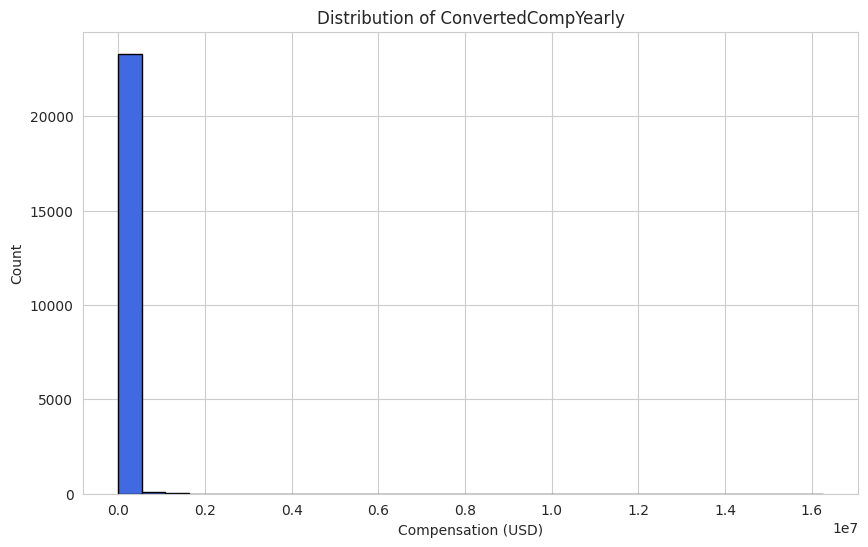

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Check for compensation column
comp_col = 'ConvertedCompYearly' if 'ConvertedCompYearly' in df.columns else 'CompTotal'

if comp_col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[comp_col].dropna(), bins=30, color='royalblue', edgecolor='black')
    plt.title(f'Distribution of {comp_col}')
    plt.xlabel('Compensation (USD)')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"Compensation column not found. Available columns: {df.columns.tolist()}")

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


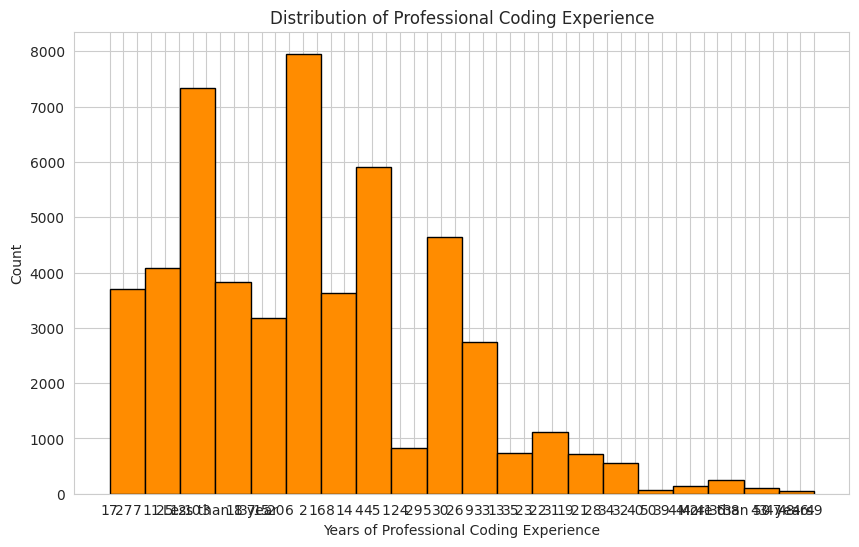

In [14]:
if 'YearsCodePro' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['YearsCodePro'].dropna(), bins=20, color='darkorange', edgecolor='black')
    plt.title('Distribution of Professional Coding Experience')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Count')
    plt.show()
else:
    print("YearsCodePro column not found")

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


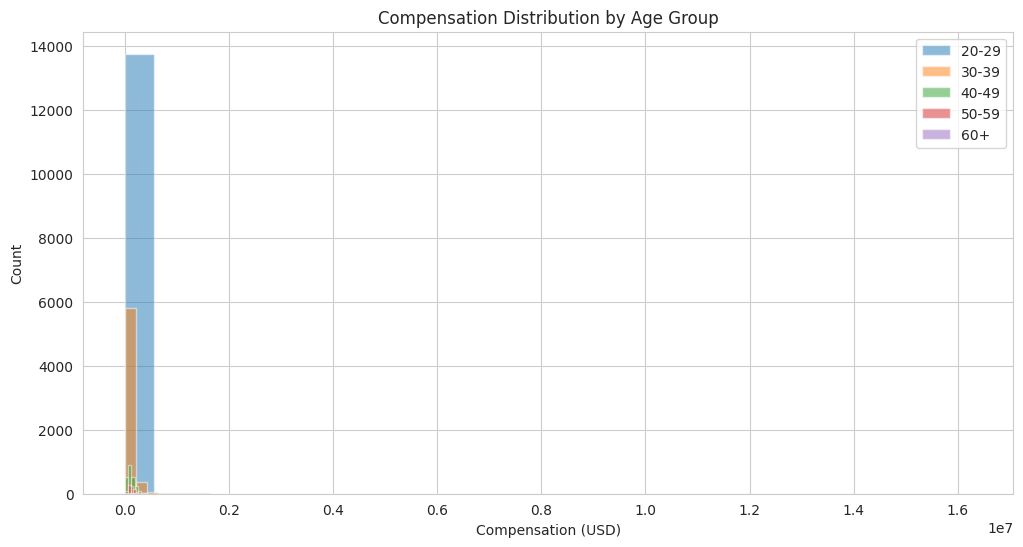

In [15]:
if 'Age' in df.columns and comp_col in df.columns:
    # Convert Age to numeric if categorical
    if df['Age'].dtype == object:
        age_map = {
            'Under 18 years old': 17,
            '18-24 years old': 21,
            '25-34 years old': 30,
            '35-44 years old': 40,
            '45-54 years old': 50,
            '55-64 years old': 60,
            '65 years or older': 70
        }
        df['AgeNumeric'] = df['Age'].map(age_map)
    else:
        df['AgeNumeric'] = df['Age']
    
    # Create age groups
    bins = [20, 30, 40, 50, 60, 70]
    labels = ['20-29', '30-39', '40-49', '50-59', '60+']
    df['AgeGroup'] = pd.cut(df['AgeNumeric'], bins=bins, labels=labels)
    
    # Plot
    plt.figure(figsize=(12, 6))
    for group in labels:
        plt.hist(df[df['AgeGroup'] == group][comp_col].dropna(), 
                bins=30, alpha=0.5, label=group)
    plt.title(f'Compensation Distribution by Age Group')
    plt.xlabel('Compensation (USD)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
else:
    print("Required columns not found")

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


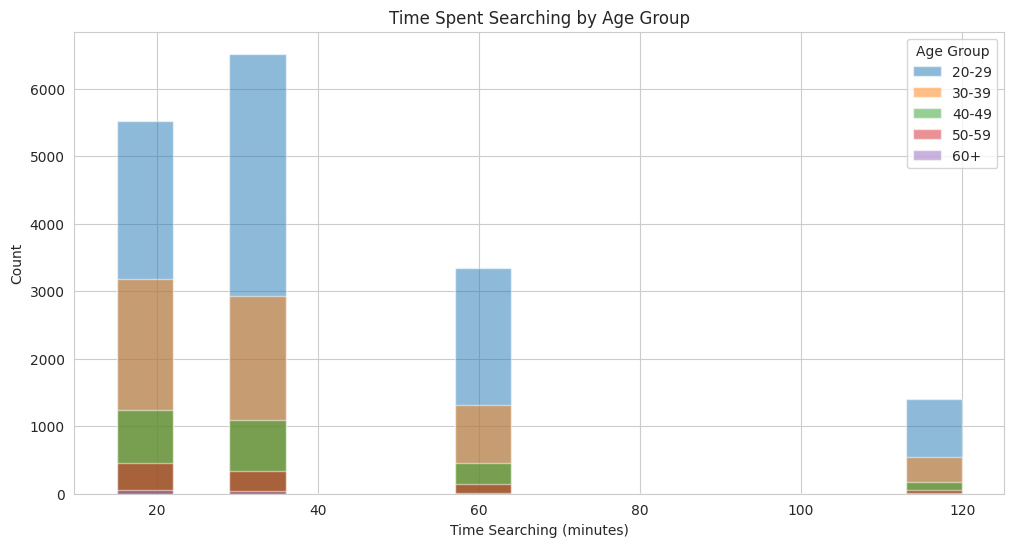

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Check if required columns exist
if 'TimeSearching' in df.columns and 'Age' in df.columns:
    
    # Convert Age to numeric if categorical
    if df['Age'].dtype == object:
        age_map = {
            'Under 18 years old': 17,
            '18-24 years old': 21,
            '25-34 years old': 30,
            '35-44 years old': 40,
            '45-54 years old': 50,
            '55-64 years old': 60,
            '65 years or older': 70
        }
        df['AgeNumeric'] = df['Age'].map(age_map)
    else:
        df['AgeNumeric'] = df['Age']
    
    # Create age groups
    bins = [20, 30, 40, 50, 60, 70]
    labels = ['20-29', '30-39', '40-49', '50-59', '60+']
    df['AgeGroup'] = pd.cut(df['AgeNumeric'], bins=bins, labels=labels)
    
    # Convert TimeSearching to numeric if needed (example conversion)
    time_searching = df['TimeSearching'].str.extract('(\d+)')[0].astype(float)
    
    # Plot
    plt.figure(figsize=(12, 6))
    for group in labels:
        plt.hist(time_searching[df['AgeGroup'] == group].dropna(), 
                bins=15, alpha=0.5, label=group)
    
    plt.title('Time Spent Searching by Age Group')
    plt.xlabel('Time Searching (minutes)')
    plt.ylabel('Count')
    plt.legend(title='Age Group')
    plt.show()

else:
    print("Required columns not found. Available columns:", df.columns.tolist())

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


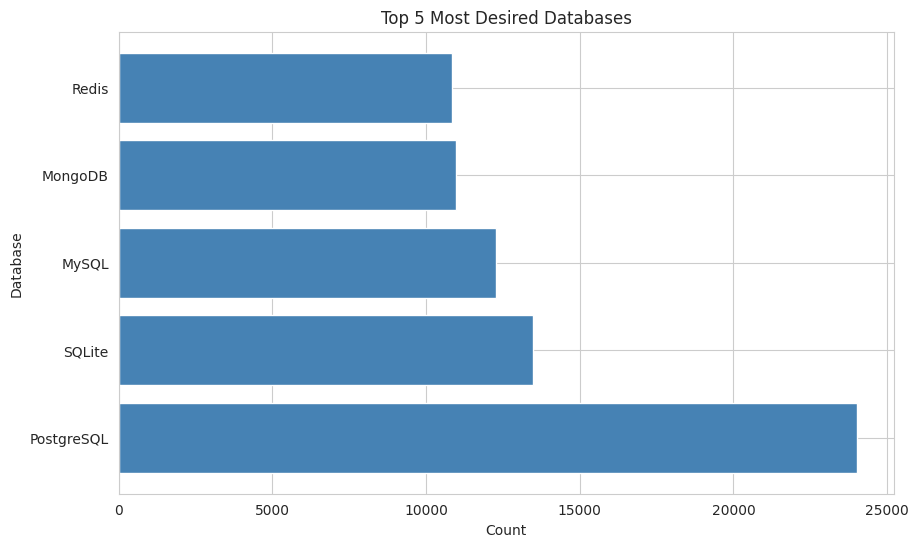

In [17]:
if 'DatabaseWantToWorkWith' in df.columns:
    top_dbs = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts().head(5)
    plt.figure(figsize=(10, 6))
    plt.barh(top_dbs.index, top_dbs.values, color='steelblue')
    plt.title('Top 5 Most Desired Databases')
    plt.xlabel('Count')
    plt.ylabel('Database')
    plt.show()
else:
    print("DatabaseWantToWorkWith column not found")

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


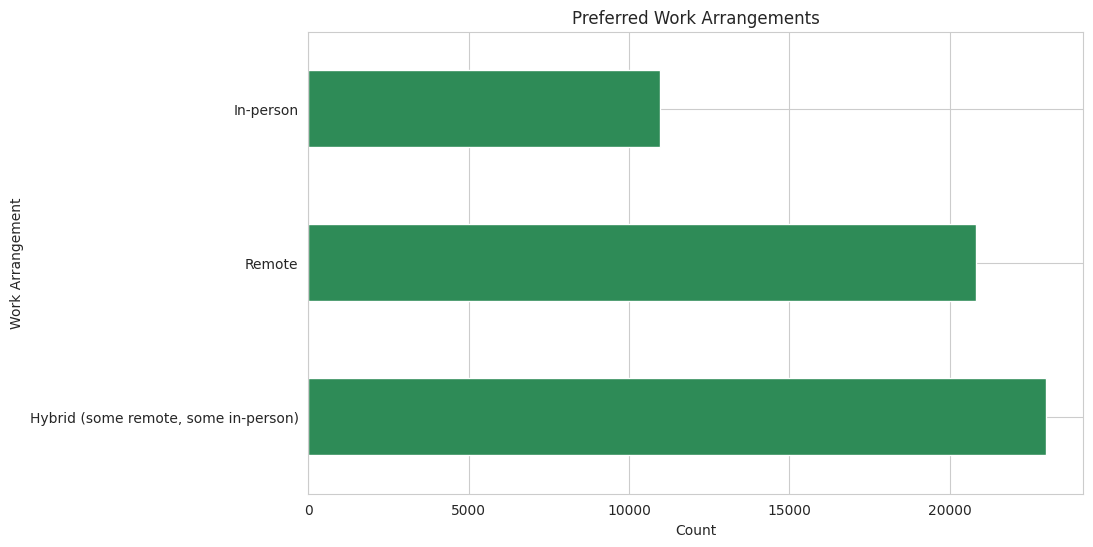

In [18]:
if 'RemoteWork' in df.columns:
    plt.figure(figsize=(10, 6))
    df['RemoteWork'].value_counts().plot.barh(color='seagreen')
    plt.title('Preferred Work Arrangements')
    plt.xlabel('Count')
    plt.ylabel('Work Arrangement')
    plt.show()
else:
    print("RemoteWork column not found")

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


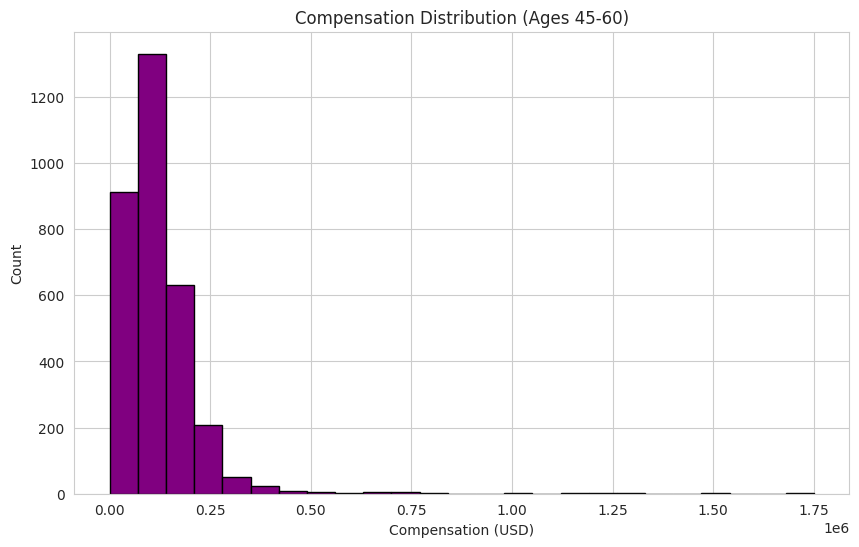

In [19]:
if 'AgeNumeric' in df.columns and comp_col in df.columns:
    mid_career = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]
    plt.figure(figsize=(10, 6))
    plt.hist(mid_career[comp_col].dropna(), bins=25, color='purple', edgecolor='black')
    plt.title(f'Compensation Distribution (Ages 45-60)')
    plt.xlabel('Compensation (USD)')
    plt.ylabel('Count')
    plt.show()
else:
    print("Required columns not found")

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [20]:
if 'JobSat' in df.columns and 'YearsCodePro' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Create experience groups
    df['ExpGroup'] = pd.cut(df['YearsCodePro'], bins=5, labels=['0-5', '5-10', '10-15', '15-20', '20+'])
    
    # Plot
    for group in df['ExpGroup'].unique():
        plt.hist(df[df['ExpGroup'] == group]['JobSat'].dropna(), 
                alpha=0.5, label=group, bins=10)
    
    plt.title('Job Satisfaction by Coding Experience')
    plt.xlabel('Job Satisfaction Level')
    plt.ylabel('Count')
    plt.legend(title='Years of Experience')
    plt.show()
else:
    print("Required columns not found")

TypeError: '<=' not supported between instances of 'float' and 'str'

<Figure size 1200x600 with 0 Axes>

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
